<a href="https://colab.research.google.com/github/shawmica/Student_GradePrediction_Model/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Set the path to your dataset inside Google Drive
dataset_path = '/content/drive/My Drive/Datanew6.xlsx'

# Load the dataset into a DataFrame
df = pd.read_excel(dataset_path, skiprows=1)

# Display the first few rows
df.head()


,sriabisan06@gmail.com,ICT/2022/004,Operating system,3,5,30,7,8,Unnamed: 8,88,A,4,0
0,vimalanarunpragash2000@gmail.com,ICT/2021/011,Mathematics and Statistics for Computing,4,6.0,30,8,8.0,NaN,100.0,B+,1,0
1,vimalanarunpragash2000@gmail.com,ICT/2021/011,Multimedia Technologies,2,10.0,30,7,5.0,NaN,80.0,C-,1,0
2,dinuruthra@gmail.com,ASB/2021/174,CHE2205,2,2.0,20,3,3.0,NaN,50.0,E,2,0
3,keerththika2001@gmail.com,ICT/2022/007,Web Technologies,2,4.0,30,10,8.0,NaN,93.0,A-,5,0
4,sistelasaththiyathevan@gmail.com,HPT/19/20/044,Statistics,2,2.0,20,8,9.0,NaN,100.0,B+,3,0


In [ ]:
# Rename the columns to match the specified names
df.columns = [
    "Email",               # email
    "RegNo",               # Registration Number
    "Subject",             # Subject name (if it exists)
    "Credits",             # Number of Credits
    "StudyHours",          # Study hours
    "AssignmentImpact",    # Impact of assignment marks in final exam
    "Quiz1",               # Assignment/Quiz Score - 1 (out of 10)
    "Quiz2",               # Assignment/Quiz Score - 2 (out of 10)
    "MidExam",             # Mid Semester Exam Marks (Optional)
    "Attendance",          # Attendance Percentage (e.g 85)
    "FinalGrade",          # Final Exam Grade
    "Engagement",          # Engagement During Lectures
    "MissedDeadlines"      # Number of Missed Deadlines
]

# Display the renamed columns
print("Renamed Columns:")
print(df.columns.tolist())

# Remove any leading or trailing spaces from column names
df.columns = df.columns.str.strip()


Renamed Columns:
['Email', 'RegNo', 'Subject', 'Credits', 'StudyHours', 'AssignmentImpact', 'Quiz1', 'Quiz2', 'MidExam', 'Attendance', 'FinalGrade', 'Engagement', 'MissedDeadlines']


In [ ]:
# Drop the specified non-feature columns
df.drop(columns=['Email', 'RegNo', 'Subject'], inplace=True)

# Confirm remaining columns
print("Remaining Columns After Drop:")
print(df.columns.tolist())


Remaining Columns After Drop:
['Credits', 'StudyHours', 'AssignmentImpact', 'Quiz1', 'Quiz2', 'MidExam', 'Attendance', 'FinalGrade', 'Engagement', 'MissedDeadlines']


In [ ]:
print("📋 List of Column Names:")
for col in df.columns:
    print("-", col)


📋 List of Column Names:
- Credits
- StudyHours
- AssignmentImpact
- Quiz1
- Quiz2
- MidExam
- Attendance
- FinalGrade
- Engagement
- MissedDeadlines


In [ ]:
# Check for null values in each column
print("Null Value Summary:")
print(df.isnull().sum())

# Optionally, display rows with any missing values
print("\nRows with Missing Data:")
print(df[df.isnull().any(axis=1)])


Null Value Summary:
Credits               0
StudyHours            0
AssignmentImpact      0
Quiz1                 0
Quiz2                 0
MidExam             816
Attendance            0
FinalGrade            0
Engagement            0
MissedDeadlines       0
dtype: int64

Rows with Missing Data:
      Credits  StudyHours  AssignmentImpact  Quiz1  Quiz2  MidExam  \
0           4         6.0                30      8    8.0      NaN   
1           2        10.0                30      7    5.0      NaN   
2           2         2.0                20      3    3.0      NaN   
3           2         4.0                30     10    8.0      NaN   
4           2         2.0                20      8    9.0      NaN   
...       ...         ...               ...    ...    ...      ...   
1000        2        10.0                20      8    6.0      NaN   
1001        4         8.0                30      5    4.0      NaN   
1002        3         4.0                30      3    3.0      NaN   
10

In [ ]:
# Drop the optional MidExam column
df.drop(columns=['MidExam'], inplace=True)

# Confirm the column has been dropped
print("Columns After Dropping 'MidExam':")
print(df.columns.tolist())


Columns After Dropping 'MidExam':
['Credits', 'StudyHours', 'AssignmentImpact', 'Quiz1', 'Quiz2', 'Attendance', 'FinalGrade', 'Engagement', 'MissedDeadlines']


In [ ]:
# Define a mapping dictionary to simplify grades
grade_map = {
    'A+': 'A', 'A': 'A', 'A-': 'A',
    'B+': 'B', 'B': 'B', 'B-': 'B',
    'C+': 'C', 'C': 'C', 'C-': 'C',
    'D+': 'F', 'D': 'F', 'D-': 'F',
    'E': 'F'
}

# Apply the mapping to create a simplified grade column
df['SimplifiedGrade'] = df['FinalGrade'].map(grade_map)

# Check result
print("Simplified Grades:")
print(df[['FinalGrade', 'SimplifiedGrade']].drop_duplicates())


Simplified Grades:
   FinalGrade SimplifiedGrade
0          B+               B
1          C-               C
2           E               F
3          A-               A
5           C               C
6          D+               F
11          A               A
16          B               B
29         C+               C
31         A+               A
62          D               F
68         B-               B


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
le = LabelEncoder()

# Fit and transform the SimplifiedGrade column
df['EncodedGrade'] = le.fit_transform(df['SimplifiedGrade'])

# Check the encoded values
print("Encoded Grades Mapping:")
for label, code in zip(le.classes_, le.transform(le.classes_)):
    print(f"{label} → {code}")


Encoded Grades Mapping:
A → 0
B → 1
C → 2
F → 3


In [ ]:
# Create average of Quiz1 and Quiz2
df['QuizAverage'] = df[['Quiz1', 'Quiz2']].mean(axis=1)

# Drop the original quiz columns
df.drop(columns=['Quiz1', 'Quiz2'], inplace=True)

print("Created QuizAverage and removed Quiz1, Quiz2")


Created QuizAverage and removed Quiz1, Quiz2


In [ ]:
df['StudyEfficiency'] = df['StudyHours'] / df['Credits']
print("Created StudyEfficiency")


Created StudyEfficiency


In [ ]:
df['ParticipationScore'] = df['Attendance'] + df['Engagement']*20
print("Created ParticipationScore")


Created ParticipationScore


In [ ]:
df['AssignmentPenaltyScore'] = df['MissedDeadlines'] * df['AssignmentImpact']
print("Created AssignmentPenaltyScore")



Created AssignmentPenaltyScore


In [ ]:
print("Combined Feature Preview:")
print(df[['QuizAverage',  'ParticipationScore', 'AssignmentPenaltyScore','StudyEfficiency']].head())


Combined Feature Preview:
   QuizAverage  ParticipationScore  AssignmentPenaltyScore  StudyEfficiency
0          8.0               120.0                       0              1.5
1          6.0               100.0                       0              5.0
2          3.0                90.0                       0              1.0
3          9.0               193.0                       0              2.0
4          8.5               160.0                       0              1.0


In [ ]:
# Final selected features
final_features = [

    'QuizAverage',
    'StudyEfficiency',
    'ParticipationScore',
    'AssignmentPenaltyScore'
]

# Features and Target
X = df[final_features]
y = df['EncodedGrade']


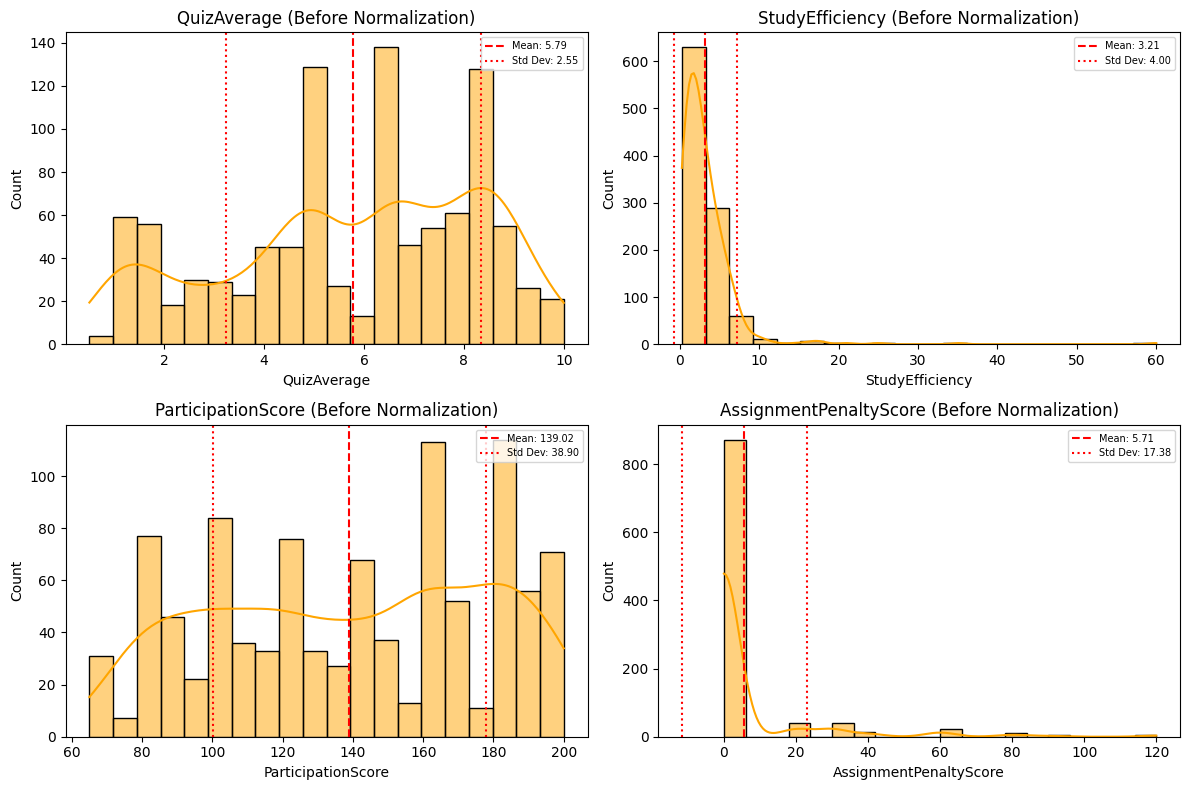

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numeric columns before normalization
numeric_columns = [
    'QuizAverage',
    'StudyEfficiency',
    'ParticipationScore',
    'AssignmentPenaltyScore'
]

# Copy for before normalization
df_before = df[numeric_columns].copy()

# Function to annotate mean and std
def annotate_stats(ax, data, color):
    mean_val = data.mean()
    std_val = data.std()
    ax.axvline(mean_val, color=color, linestyle="--", label=f"Mean: {mean_val:.2f}")
    ax.axvline(mean_val + std_val, color=color, linestyle=":", label=f"Std Dev: {std_val:.2f}")
    ax.axvline(mean_val - std_val, color=color, linestyle=":")
    ax.legend(loc="upper right", fontsize=7)

# Plot histograms before normalization
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns):
    ax = plt.subplot(2, 2, i + 1)
    sns.histplot(df_before[col], bins=20, kde=True, color="orange", ax=ax)
    annotate_stats(ax, df_before[col], "red")
    ax.set_title(f"{col} (Before Normalization)")
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import zscore

# Define numeric columns for normalization
numeric_columns = [
    'QuizAverage',
    'StudyEfficiency',
    'ParticipationScore',
    'AssignmentPenaltyScore']

# Apply z-score normalization
df[numeric_columns] = df[numeric_columns].apply(zscore)

# Confirm
print("Normalized numeric columns using Z-score:")
print(df[numeric_columns].head())


Normalized numeric columns using Z-score:
   QuizAverage  StudyEfficiency  ParticipationScore  AssignmentPenaltyScore
0     0.866929        -0.428213           -0.489101               -0.328709
1     0.083005         0.446479           -1.003493               -0.328709
2    -1.092881        -0.553169           -1.260688               -0.328709
3     1.258891        -0.303257            1.388428               -0.328709
4     1.062910        -0.553169            0.539682               -0.328709


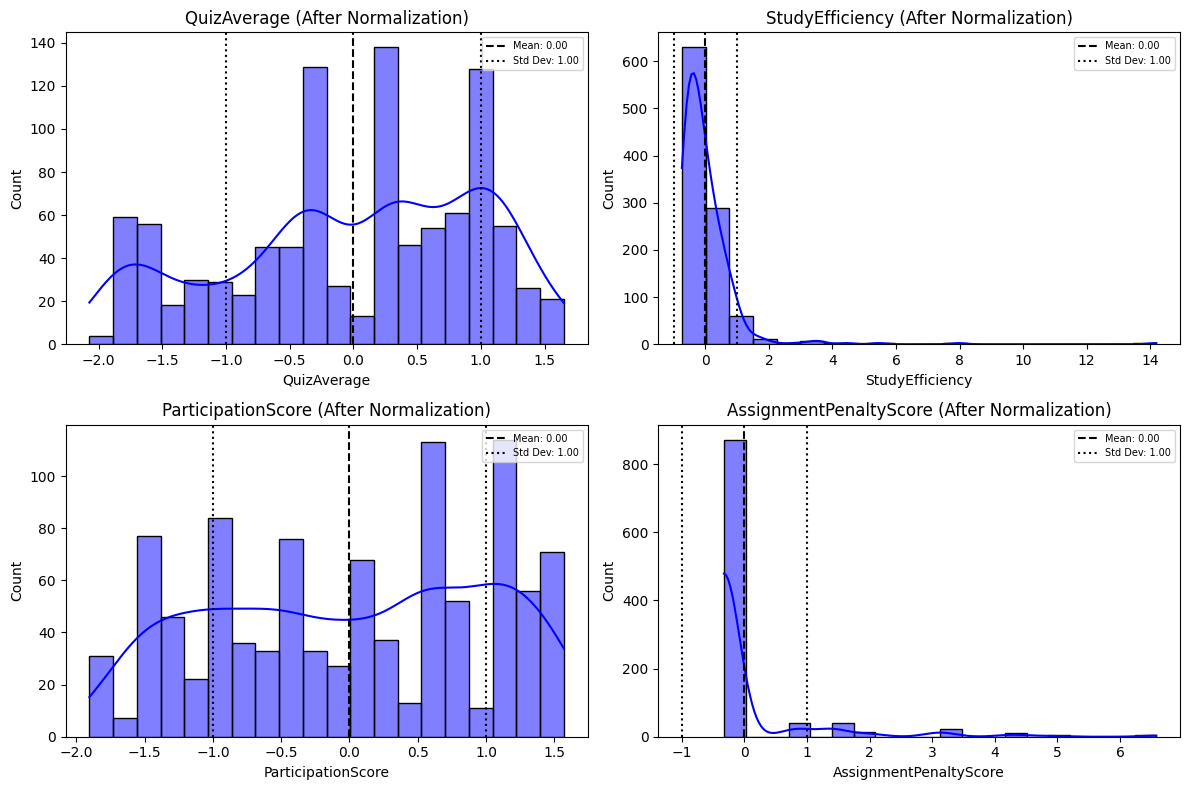

In [ ]:
# Copy for after normalization
df_after = df[numeric_columns].copy()

# Function to annotate mean and std
def annotate_stats(ax, data, color):
    mean_val = data.mean()
    std_val = data.std()
    ax.axvline(mean_val, color=color, linestyle="--", label=f"Mean: {mean_val:.2f}")
    ax.axvline(mean_val + std_val, color=color, linestyle=":", label=f"Std Dev: {std_val:.2f}")
    ax.axvline(mean_val - std_val, color=color, linestyle=":")
    ax.legend(loc="upper right", fontsize=7)

# Plot histograms after normalization
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns):
    ax = plt.subplot(2, 2, i + 1)
    sns.histplot(df_after[col], bins=20, kde=True, color="blue", ax=ax)
    annotate_stats(ax, df_after[col], "black")
    ax.set_title(f"{col} (After Normalization)")
plt.tight_layout()
plt.show()


In [ ]:
# Add EncodedGrade to feature DataFrame
df_corr = df.copy()

# Compute correlation matrix
correlation_matrix = df_corr.corr(numeric_only=True)

# Display correlation of each feature with EncodedGrade
print("Correlation of Features with Grade:")
print(correlation_matrix['EncodedGrade'].sort_values(ascending=False))


Correlation of Features with Grade:
EncodedGrade              1.000000
MissedDeadlines           0.055840
Credits                   0.052422
AssignmentPenaltyScore    0.034089
AssignmentImpact         -0.205105
Attendance               -0.248163
StudyEfficiency          -0.415804
StudyHours               -0.539633
ParticipationScore       -0.604240
Engagement               -0.643905
QuizAverage              -0.912609
Name: EncodedGrade, dtype: float64


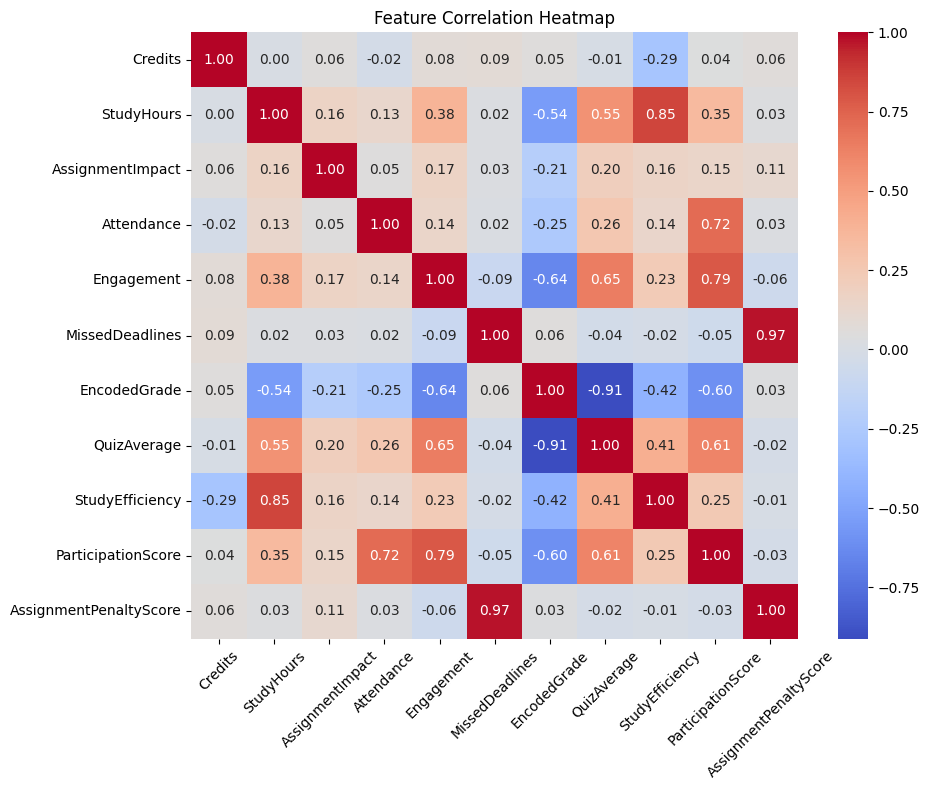

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make a copy of the original DataFrame
df_corr = df.copy()

# Compute the correlation matrix (numeric columns only)
correlation_matrix = df_corr.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)

plt.title("Feature Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# First split: Train (70%) and Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Second split: Validation (15%) and Test (15%) from Temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Combine features and targets back into DataFrames
train_df = X_train.copy()
train_df['EncodedGrade'] = y_train

val_df = X_val.copy()
val_df['EncodedGrade'] = y_val

test_df = X_test.copy()
test_df['EncodedGrade'] = y_test


In [ ]:
# Save to Excel
train_df.to_excel("train_data.xlsx", index=False)
val_df.to_excel("val_data.xlsx", index=False)
test_df.to_excel("test_data.xlsx", index=False)

print(" Excel files created: train_data.xlsx, val_data.xlsx, test_data.xlsx")


 Excel files created: train_data.xlsx, val_data.xlsx, test_data.xlsx


In [ ]:
from google.colab import files

files.download("train_data.xlsx")
files.download("val_data.xlsx")
files.download("test_data.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Check class distribution in training data
print("Class Distribution in Training Data:")
print(y_train.value_counts())



Class Distribution in Training Data:
EncodedGrade
2    176
0    176
3    176
1    176
Name: count, dtype: int64
